`Objective`:

This project aims to develop a machine learning model for predicting flight prices by leveraging historical data. We will systematically follow the data science life cycle, addressing key challenges in data preprocessing, feature engineering, model selection, and optimization. Our goal is to build a robust and efficient prediction system that can provide accurate price estimations based on various flight attributes.

## Let's Read Data!

### Import Necessary Packages
Before starting, we need to import essential libraries for data manipulation, numerical operations, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset
Since our data is stored in an Excel file, we use pandas.read_excel() to load it into a DataFrame.

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

Before proceeding, it's important to get a glimpse of the dataset's structure.

In [3]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Let's Deal with Missing Values
To understand the dataset's structure and memory usage, we use `info()` - which displys column names, data types, and non-null counts.


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Insights
`Object Type:` 10 features are classified as objects, meaning they  contain string or categorical data. \
`Integer Type:` 1 feature is of type int64, a 64-bit signed integer. \

`int64` has the highest range for storing numbers. \
Memory usage increases with bit length, affecting performance. \
Using `memory_usage='deep'` provides a more accurate report.

In [6]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.3 MB


## Handling Missing Values



In [7]:
# computes the total missing values column-wise ( default axis=0 )
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [8]:
train_data['Total_Stops'].isnull()

,Total_Stops
0,False
1,False
2,False
3,False
4,False
...,...
10678,False
10679,False
10680,False
10681,False


In [9]:
# This gives you rows containing null values for `Total_Stops`
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Since we have only `one missing value`, we can directly drop it

In [10]:
train_data.dropna(inplace=True)

`inplace=True` ensures changes are applied directly

In [11]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [12]:
train_data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


# Data Preprocessing & Extracting Derived Attributes from `Date_of_Journey`

Before modifying data, we make a copy to preserve the original dataset.



In [13]:
data = train_data.copy()

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


## Converting Date_of_Journey into Datetime Format
The `Date_of_Journey` column is stored as an `object (string)`. Machine learning models require numerical values, not strings. We use pandas `.to_datetime()` to convert this column into timestamp format.


In [17]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

<ipython-input-17-ade7bef7990f>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


Instead of converting each column manually, we can define a function.


In [18]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [19]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

<ipython-input-18-ce75d6515f1a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
<ipython-input-18-ce75d6515f1a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])


In [20]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


# Extracting Derived Attributes (Day, Month, Year)
Now `Date_of_Journey` is converted, we can extract useful attributes



In [21]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [22]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-02 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-02 05:50:00,2025-06-02 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-02 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


# Cleaning Dep_Time & Arrival_Time, Then Extracting Derived Attributes
Extracting `Hour` & `Minute` from `Time Columns`. Since `Dep_Time` and `Arrival_Time` are stored in `datetime format`, we extract hour and minute values for better feature representation.

In [23]:
def extract_hour_min(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df.head(3)

In [24]:
extract_hour_min(data, "Dep_Time")
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-06-02 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-06-02 05:50:00,2025-06-02 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-06-02 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Since we’ve extracted meaningful time attributes, we should remove the original datetime columns. This prevents redundancy, keeping only relevant features.

In [25]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis=1, inplace=True)

In [26]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [27]:
data.shape

(10682, 16)

# Analyzing Flight Departure Times

Since `Dep_Time_hour` contains numeric hour values, we could categorize flights into time slots




In [28]:
def flight_dep_time(x):
    '''
    Converts flight departure hours into meaningful categories.
    '''
    if (x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Noon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_hour'>

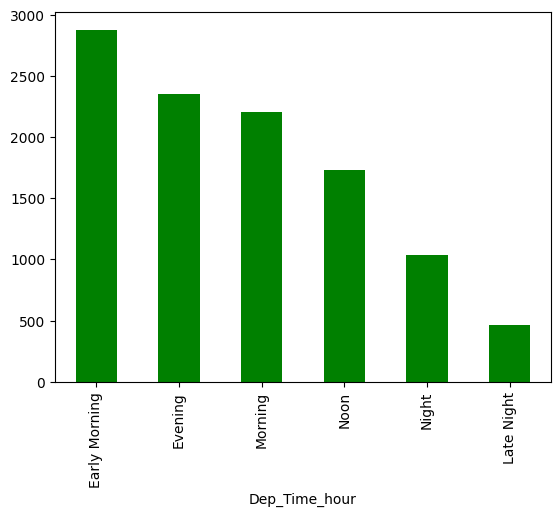

In [29]:
# Now lets visualizing flight departures using a static bar chart
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="green")

## Preprocessing & Extracting Meaningful Features from Duration

`Duration` data includes `hours (h)` and `minutes (m)`, but some rows might be missing either.
We standardize missing values by inserting `0h` or `0m`.



In [30]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

In [31]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

## Converting Duration into Numeric Format
Since `Duration` is still stored as a `string`, Now we could extract numeric values out of it.




In [32]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

`split(' ')[0][0:-1]` - extracts hours (removing the "h" suffix) \
`split(' ')[1][0:-1]` - extracts minutes (removing the "m" suffix)

## Alternative way using Pandas Timedelta object
Instead of manually processing duration, Pandas provides to_timedelta() object. Which automatically interprets duration values.



In [33]:
pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

In [34]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,7,25


# Analyzing Whether Duration Impacts Price
Since Duration contains mixed hour (h) and minute (m) values, we convert it into total minutes. Replace "h" with *60 to convert hours into minutes. And replace spaces with + to ensure proper calculations. In the final convert "m" to *1 to retain minute values.


In [35]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

In [36]:
data['Duration_total_mins']

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [37]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins'],
      dtype='object')

## **Visualizing the Relationship Between Duration & Price**

display the distribution of price based on flight duration

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

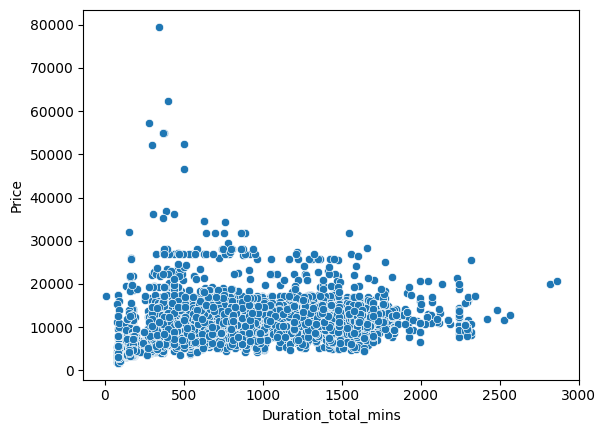

In [38]:
import seaborn as sns
sns.scatterplot(x="Duration_total_mins", y="Price", data=data)

## linear regression plot





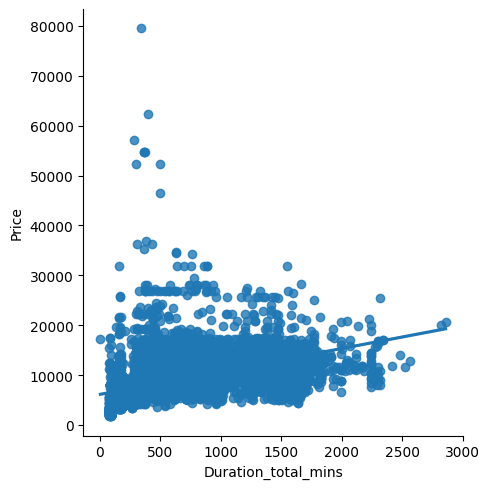

In [39]:
sns.lmplot(x="Duration_total_mins", y="Price", data=data)

`Observation`  \
Longer flight durations generally lead to higher prices

Outliers might exist, but a positive correlation is visible

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

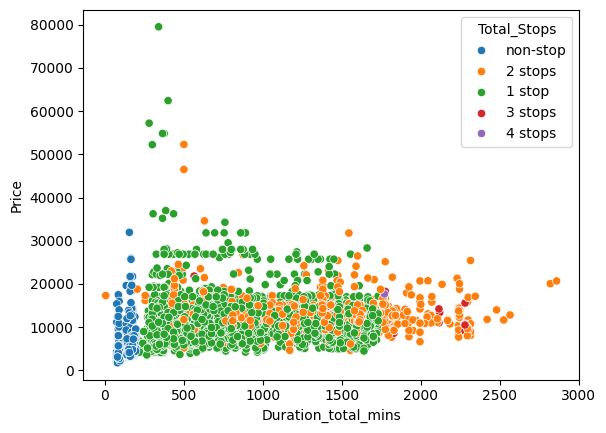

In [40]:
## does the Number of Stops Affect Price?
## add hue="Total_Stops" to visualize how stops impact prices
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)



*   Non-stop flights tend to have shorter durations and lower fares
*   As the number of stops increases, duration and price also increase

`Conclusion`
Direct flights are generally cheaper and shorter
More layovers add time and cost to the ticket

## Jet Airways Route Analysis
`Problem Statement:` Find the Most Frequent Jet Airways Route

To determine on which route Jet Airways is most commonly used, filter the dataset to only include flights operated by Jet Airways. Then group by Route and counts occurrences. And in the last sort in descending order to show most frequently used routes.







In [41]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
DEL → JAI → BOM → COK,207
BOM → HYD,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


## Conclusion
From the analysis, the top routes where Jet Airways operates the most are -->

`CCU → BOM → BLR (930 flights)`

`DEL → BOM → COK (875 flights)`

`BLR → BOM → DEL (385 flights)`

✔ Kolkata (CCU) to Bangalore (BLR) via Mumbai (BOM) is the most frequently traveled route under Jet Airways.

✔ Delhi (DEL) serves as a major hub, connecting flights to multiple destinations.

✔ Stopovers at Mumbai (BOM) are common, indicating its importance as a transit point.

## Analyzing Airline vs Price




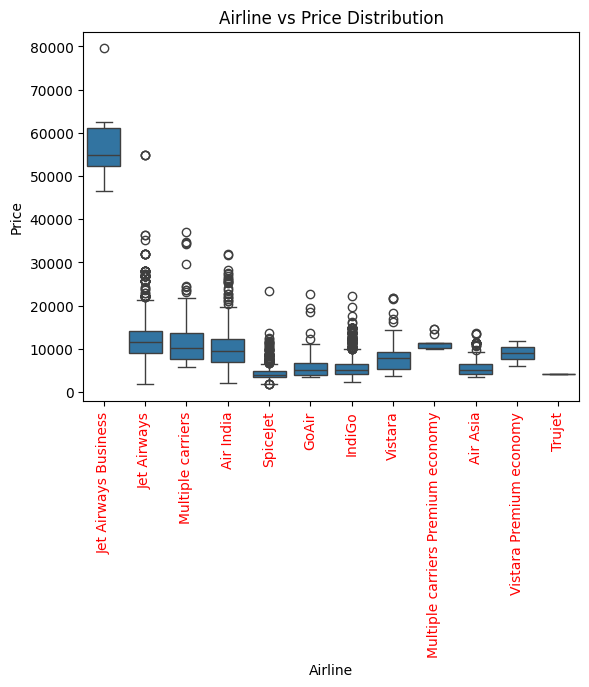

In [42]:
sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation="vertical", color='red')
plt.title("Airline vs Price Distribution")
plt.show()

## Conclusion
✔ Jet Airways Business class has the highest price

✔ Most airlines have a similar median price range

✔ Non-stop or premium flights tend to be costlier

## Applying One-Hot Encoding on Data

`Categorical Data:` Stored in labels or groups (e.g., age group, educational level, blood type)

`Numerical Data:` Stored in numbers (e.g., height, weight, age)

### Numerical data is further classified into -->

`Discrete Data:` Countable numbers (e.g., age in days, number of products sold).

`Continuous Data:` Continuous values (e.g., temperature, bank balance)

# Identifying Categorical & Numerical Columns

In [43]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]
num_col = [col for col in data.columns if data[col].dtype != "object"]

## Handling Categorical Data
We apply `two encoding techniques -->

`Nominal Data` (no order) → `One-Hot Encoding`

`Ordinal Data (ordered categories) → `Label Encoding`

However, real-world applications may use other advanced encoding techniques based on context.

In [44]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

## Applying One-Hot Encoding Manually...


In [45]:
## unique categories from Source col
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [46]:
## Convert "Banglore" into a binary representation
data['Source'].apply(lambda x: 1 if x == 'Banglore' else 0)

,Source
0,1
1,0
2,0
3,0
4,1
...,...
10678,0
10679,0
10680,1
10681,1


In [47]:
## apply One-Hot Encoding for all categories -->
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [48]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


# Performing Target Guided Encoding on Data

### Why Not Use One-Hot Encoding for All Features?
One-Hot Encoding works well for categorical features like Airline and Destination as there is no inherent order.

However, features like Total_Stops represent ordinal data (increasing stops affect flight duration & pricing logically).

If we apply One-Hot Encoding on highly categorical features, it creates the curse of dimensionality, consuming more memory & computational resources.



## **Using Target Guided Mean Encoding**
To overcome the curse of dimensionality, we apply Target Guided Mean Encoding, which replaces categories with their respective mean target value.

In [49]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [50]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0


In [51]:
data['Airline'].nunique()

12

In [52]:
data.groupby(['Airline'])['Price'].mean().sort_values()

,Price
Airline,
Trujet,4140.000000
SpiceJet,4338.284841
Air Asia,5590.260188
IndiGo,5673.682903
GoAir,5861.056701
Vistara,7796.348643
Vistara Premium economy,8962.333333
Air India,9612.427756
Multiple carriers,10902.678094


In [53]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [54]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [55]:
dict_airlines = {airline:index for index , airline in enumerate(airlines , 0)}

In [56]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [57]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [58]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


### now lets perform Target Guided Mean encoding on 'Destination' ...

In [59]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

## Considering Airport Classification in Delhi

Currently, `Indira Gandhi International Airport (IGI)` is the only operational airport in `Delhi`. Since `New Delhi` and `Delhi` refer to the same metropolitan region, we consider them equivalent for flight analysis.

Future Expansion: Jewar Airport
A second airport in Greater Noida (Jewar) is under development.

Once operational, flight routes and pricing structures may change.

Future datasets should account for multiple airport entries within the Delhi region.

In [60]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

<ipython-input-60-ef93d9fe477b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)


In [61]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [62]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [63]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [64]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [65]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [66]:
data['Destination'] = data['Destination'].map(dict_dest)

In [67]:
data['Destination']

,Destination
0,2
1,3
2,4
3,3
4,2
...,...
10678,3
10679,3
10680,2
10681,2


In [68]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


# Perform Label(Manual) Encoding on Data

In [69]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0


In [70]:
data['Total_Stops']

,Total_Stops
0,non-stop
1,2 stops
2,2 stops
3,1 stop
4,1 stop
...,...
10678,non-stop
10679,non-stop
10680,non-stop
10681,non-stop


In [71]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

As this is case of Ordinal Categorical type we perform Label encoding from scratch !

Here Values are assigned with corresponding key...

In [72]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [73]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [74]:
data['Total_Stops']

,Total_Stops
0,0
1,2
2,2
3,1
4,1
...,...
10678,0
10679,0
10680,0
10681,0


## **Remove Un-necessary features**

In [75]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0


In [76]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [77]:
data['Additional_Info'].value_counts()/len(data)*100

,count
Additional_Info,
No info,78.112713
In-flight meal not included,18.554578
No check-in baggage included,2.995694
1 Long layover,0.177869
Change airports,0.065531
Business class,0.037446
No Info,0.028085
1 Short layover,0.009362
Red-eye flight,0.009362


`Additional_Info` contains almost `80%` `no_info`,so we can drop this column

In [78]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,2,50,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,7,25,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,19,0,19,0,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,5,25,5,25,325,0,1,0,0,0


In [79]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [80]:
data['Journey_year'].unique()

array([2019], dtype=int32)

We drop `Date_of_Journey`, `Duration_total_mins`, `Source`, and `Journey_year` since their relevant features have already been extracted or encoded.

`Additional_Info` should be removed due to `80% missing values`, making it irrelevant for analysis.

We drop `Route` as it directly correlates with `Total_Stops`, avoiding redundancy in our ML model.

Similarly, `Duration` should be removed since `Duration_hours` and `Duration_mins` already capture the required information.

In [81]:
data.drop(columns=['Date_of_Journey', 'Additional_Info', 'Duration_total_mins', \
                   'Source', 'Journey_year', 'Route', 'Duration'], axis=1, inplace=True)

In [82]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [83]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,18,5,23,30,5,25,5,25,0,1,0,0,0


# Performing Outlier Detection
### **`Causes of Outliers`**
`Data Entry Errors:` Mistakes during data collection, recording, or input can introduce outliers.

`Measurement Error:` Faulty instruments or inaccurate readings are common sources of data inconsistencies.

## Visualizing Outliers
We use several plots to detect anomalies in the dataset such as -->

`Box Plot` – Identifies extreme values and spread.

`Scatter Plot` – Reveals abnormal distributions in data.

`Histogram` – Shows skewness and irregular frequency.

`Distribution Plot` – Provides an overall shape of data distribution.

In [84]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

    sns.histplot(df[col], ax=ax1, kde=True)   # Histogram with KDE
    sns.boxplot(x=df[col], ax=ax2)            # Box plot to detect outliers
    sns.scatterplot(x=df.index, y=df[col], ax=ax3)  # Scatter plot for anomalies
    plt.show()

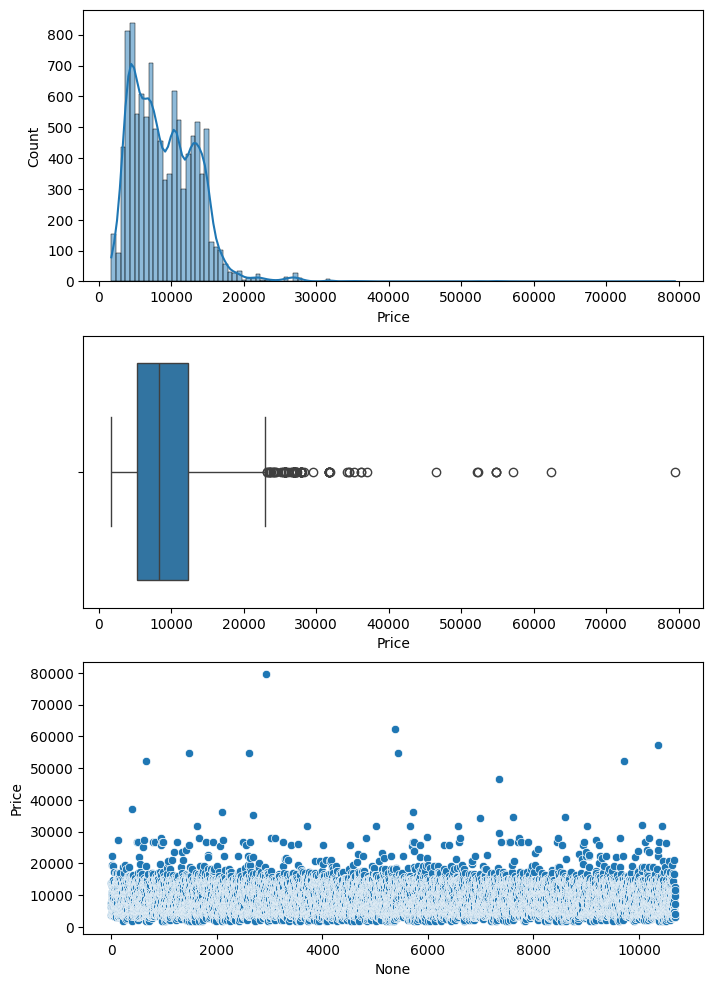

In [85]:
plot(data, "Price")

## **Detecting Outliers Using IQR (Interquartile Range)**
Outliers are defined using IQR, where

IQR = 75th percentile - 25th percentile

Any value outside IQR ± 1.5 × IQR is considered an outlier.




In [86]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

In [87]:
print(f"Maximum threshold: {maximum}")
print(f"Minimum threshold: {minimum}")

Maximum threshold: 23017.0
Minimum threshold: -5367.0


In [88]:
## Identifying outliers
outliers = [price for price in data['Price'] if price > maximum or price < minimum]

In [89]:
print(f"Total outliers detected: {len(outliers)}")

Total outliers detected: 94


## **Handling Outliers**
For extreme values, we replace prices above ₹35,000 with the median value...

In [90]:
data['Price'] = np.where(data['Price'] >= 35000, data['Price'].median(), data['Price'])

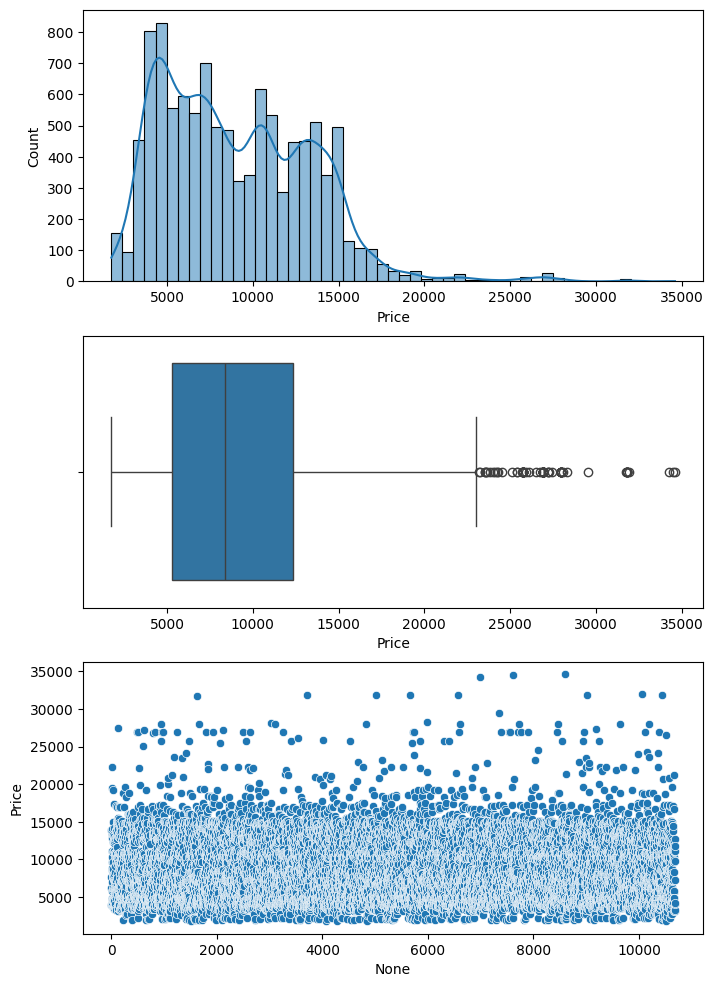

In [91]:
## Replot after outlier handling
plot(data, 'Price')

In [92]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_hour', 'Duration_minute', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

# Performing Feature Selection
## **Why Feature Selection?**
Feature selection helps identify the `most relevant variables` that contribute effectively to `the target variable (Price)`.

This process -->

*   Eliminates redundant features, reducing complexity.
*   Mitigates the curse of dimensionality, improving model efficiency.
*   Enhances interpretability by focusing on meaningful attributes.


## **Applying Mutual Information Regression**
Mutual Information measures the dependency between two variables—higher values indicate stronger relationships.




In [93]:
from sklearn.feature_selection import mutual_info_regression

## Split independent (X) and dependent (y) variables
X = data.drop(['Price'], axis=1)
y = data['Price']

In [95]:
## Save the feature columns (imp)
import pickle
feature_columns = X.columns.tolist()
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

In [96]:
## Compute feature importance using Mutual Information
imp = mutual_info_regression(X, y)

## Ranking Feature Importance
Lets create a ranked list of features based on their impact on Price.

In [97]:
imp_df = pd.DataFrame(imp, index=X.columns, columns=['importance'])
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.318764
Arrival_Time_hour,1.138278
Duration_hours,1.117308
Destination,1.065483
Duration_hour,0.957383
Dep_Time_hour,0.913696
Arrival_Time_minute,0.899161
Total_Stops,0.785431
Dep_Time_minute,0.762008
Duration_mins,0.681180


## Conclusion -->
`Since all features have meaningful importance values, we retain all of them to maximize model performance.`

## Building an ML Model for Flight Price Prediction
**Splitting Dataset into Train & Test Sets** \
We divide the data into training and testing sets to ensure the model learns effectively.



In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [143]:
X_train.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
752,3,4,1,27,5,16,0,21,0,5,0,0,0,1,0,0
7430,3,3,0,6,3,15,10,17,45,2,35,0,1,0,0,0
5478,10,3,1,12,6,18,55,19,50,24,55,0,1,0,0,0
3445,10,4,1,6,6,11,30,4,25,16,55,0,0,1,0,0
9126,10,4,1,9,5,20,55,4,25,7,30,0,0,1,0,0


In [146]:
X_test.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
6075,8,4,2,21,5,15,5,1,30,10,25,0,0,1,0,0
3544,4,4,1,3,6,10,35,19,35,9,0,0,0,1,0,0
9291,5,3,1,9,5,20,20,9,5,12,45,0,1,0,0,0
5032,3,0,0,24,5,14,45,17,5,2,20,0,0,0,1,0
2483,10,4,1,21,5,22,50,4,25,5,35,0,0,1,0,0


We start by building a basic Random Forest Regressor, which will later be fine-tuned.

In [147]:
from sklearn.ensemble import RandomForestRegressor

## Initialize the model
ml_model = RandomForestRegressor()
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
## Make predictions
y_pred = ml_model.predict(X_test)

In [149]:
y_pred

array([16873.32,  5420.98,  8783.34, ...,  3506.81,  6294.69,  6873.75])

In [150]:
## Lets try Evaluating the model using R² score
from sklearn import metrics
print("R² Score:", metrics.r2_score(y_test, y_pred))

R² Score: 0.8104232364485086


## **Save the Model Using Pickle**
To ensure reusability, we save the trained model. This is useful when handling new datasets without retraining.




In [151]:
import pickle

# Save the model
with open('rf_random.pkl', 'wb') as file:
    pickle.dump(ml_model, file)

In [152]:
# Load the model
with open('rf_random.pkl', 'rb') as model:
    forest = pickle.load(model)

In [153]:
X_train.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
752,3,4,1,27,5,16,0,21,0,5,0,0,0,1,0,0
7430,3,3,0,6,3,15,10,17,45,2,35,0,1,0,0,0
5478,10,3,1,12,6,18,55,19,50,24,55,0,1,0,0,0
3445,10,4,1,6,6,11,30,4,25,16,55,0,0,1,0,0
9126,10,4,1,9,5,20,55,4,25,7,30,0,0,1,0,0


In [154]:
# Verify feature count
print("Feature Count After Fix:", X_train.shape[1])

Feature Count After Fix: 16


In [155]:
X_test.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
6075,8,4,2,21,5,15,5,1,30,10,25,0,0,1,0,0
3544,4,4,1,3,6,10,35,19,35,9,0,0,0,1,0,0
9291,5,3,1,9,5,20,20,9,5,12,45,0,1,0,0,0
5032,3,0,0,24,5,14,45,17,5,2,20,0,0,0,1,0
2483,10,4,1,21,5,22,50,4,25,5,35,0,0,1,0,0


In [156]:
# Verify feature count
print("Feature Count After Fix:", X_test.shape[1])

Feature Count After Fix: 16


In [157]:
# Predict using the saved model
y_pred2 = forest.predict(X_test)

In [158]:
y_pred2

array([16873.32,  5420.98,  8783.34, ...,  3506.81,  6294.69,  6873.75])

In [159]:
## evaluate again
print("R² Score After Loading Model:", metrics.r2_score(y_test, y_pred2))

R² Score After Loading Model: 0.8104232364485086


# Automating the ML Pipeline
To streamline the ML workflow, we create a function that automatically trains a model and evaluates its performance.



## **Define the predict() Function that  -->**

Trains the ML model using X_train and y_train

Makes predictions on X_test

Calculates performance metrics including `R² score`, `MAE`, `MSE`, `RMSE`, and `MAPE`

Visualizes error distribution using sns.distplot().

In [160]:
from sklearn import metrics

def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print(f'Training score: {model.score(X_train, y_train)}')

    y_prediction = model.predict(X_test)
    print(f'Predictions: {y_prediction}\n')

    print(f'R² Score: {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE: {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE: {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')

    sns.histplot(y_test - y_prediction, kde=True)

Now try to apply to Different Models - Simply call the predict() function with different models...



Training score: 0.9512777891403811
Predictions: [16868.98  5356.87  8862.82 ...  3518.31  6365.75  6869.53]

R² Score: 0.8105564572504198
MAE: 1176.1360284292646
MSE: 3688011.049449629
RMSE: 1920.419498299689


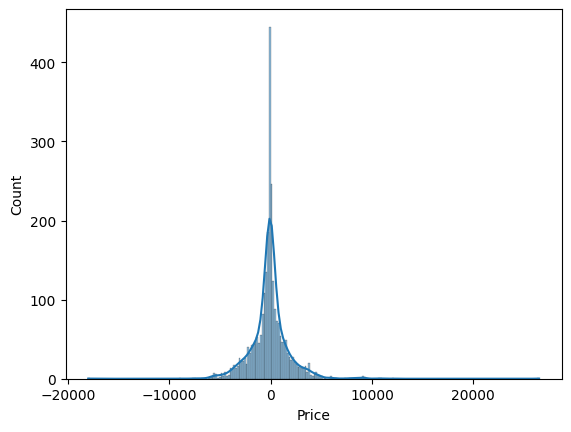

In [161]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

Training score: 0.966591628243878
Predictions: [16840.  4959.  8085. ...  3419.  5797.  6442.]

R² Score: 0.68365388865906
MAE: 1402.7765256458254
MSE: 6158499.45130101
RMSE: 2481.632416636479


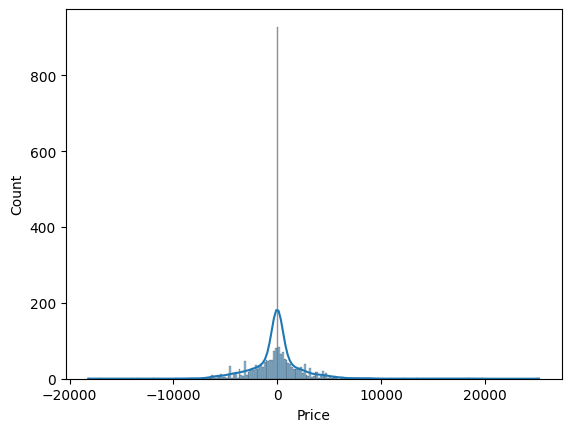

In [162]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor())

# Hyperparameter Tuning for ML Models

`How to Choose the Right ML Algorithm?`

To determine the best ML algorithm -->

*   Test multiple models on the dataset
*   Perform hyperparameter optimization to improve performance
*   Apply cross-validation to ensure reliability
*   Evaluate using various metrics (e.g., R² score, RMSE, MSE)
*   And in the last leverage domain expertise to finalize the best-performing model

















`What is Hyperparameter Tuning?`

Hyperparameter tuning helps optimize a model by finding the best combination of parameters.

We use two common methods-->


*  `RandomizedSearchCV` → Faster but may not find the absolute best parameters
*   `GridSearchCV` → Exhaustive search, slower but more precise

In [163]:
from sklearn.ensemble import RandomForestRegressor
## Initialize the Random Forest model
reg_rf = RandomForestRegressor()

In [164]:
## Define parameter space
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_features = ["auto", "sqrt"]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]
min_samples_split = [5, 10, 15, 100]

In [165]:
# Create hyperparameter grid
random_grid = {'n_estimators': n_estimators, \
               'max_features': max_features, \
               'max_depth': max_depth, \
               'min_samples_split': min_samples_split}

In [166]:
## we use RandomizedSearchCV to choose best hyperparameters ...
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=reg_rf, \
                               param_distributions=random_grid, \
                               cv=3,n_jobs=-1, verbose=2)

In [167]:
# Train on dataset
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [168]:
print("Best Hyperparameters:", rf_random.best_params_)

Best Hyperparameters: {'n_estimators': 320, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 30}


In [169]:
print("Best Model:", rf_random.best_estimator_)

Best Model: RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=320)


In [170]:
print("Best CV Score:", rf_random.best_score_)

Best CV Score: 0.8038086881373591


In [172]:
X_test.head()

,Airline,Destination,Total_Stops,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
6075,8,4,2,21,5,15,5,1,30,10,25,0,0,1,0,0
3544,4,4,1,3,6,10,35,19,35,9,0,0,0,1,0,0
9291,5,3,1,9,5,20,20,9,5,12,45,0,1,0,0,0
5032,3,0,0,24,5,14,45,17,5,2,20,0,0,0,1,0
2483,10,4,1,21,5,22,50,4,25,5,35,0,0,1,0,0


In [173]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300, 500]})

In [174]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Model:", grid_search.best_estimator_)
print("Best CV Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 500}
Best Model: RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=500)
Best CV Score: 0.8247971119011283


In [175]:
# Save the trained model
with open("best_rf_model.pkl", "wb") as file:
    pickle.dump(grid_search.best_estimator_, file)
print("Saved successfully!")

Saved successfully!
